In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [33]:
cities_data=pd.read_csv("cities.csv")
cities_data_clean=cities_data.sample(n=500)
cities_data_clean


,City_ID,City_ID.1,City_ID.1.1,City_ID.1.1.1,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
408,386,192,272,272,sao felix do xingu,100,BR,1558378837,92,-6.64,-51.99,80.34,3.74
159,65,393,2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
480,85,266,150,150,talnakh,75,RU,1558378783,92,69.49,88.39,15.80,29.08
167,139,469,153,153,porto novo,20,BR,1558378783,53,-23.68,-45.44,77.00,4.70
89,423,71,368,368,zyryanovsk,100,KZ,1558378588,88,49.74,84.27,48.84,1.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,387,90,143,143,yichun,89,CN,1558378781,98,47.72,128.88,41.64,3.58
176,437,348,283,283,christchurch,1,NZ,1558378744,100,-43.53,172.64,51.01,3.36
129,378,272,262,262,umtata,0,ZA,1558378835,51,-31.59,28.78,60.80,17.22
304,346,381,227,227,tabas,100,IR,1558378798,18,33.60,56.92,89.60,9.17


In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs =zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# lat_lngs
# cord_df=pd.DataFrame({"Cordinates": lat_lngs})
# cord_df

601

In [35]:
cities_df=pd.DataFrame({"Cities": cities})

cities_df['Cloudiness'] = ''
cities_df['Country'] = ''
cities_df['Date'] = ''
cities_df['Humidity'] = ''
cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Wind Speed'] = ''
cities_df

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kantang,,,,,,,,
1,saint-ambroise,,,,,,,,
2,palmer,,,,,,,,
3,yellowknife,,,,,,,,
4,planaltina,,,,,,,,
...,...,...,...,...,...,...,...,...,...
596,brigantine,,,,,,,,
597,hede,,,,,,,,
598,mumford,,,,,,,,
599,inirida,,,,,,,,


In [36]:
sets=1
record_count=1

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
# complete_url = url + appid= + weather_api_key + &q= + cities 
# for
# if
# try
# except


for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >=50):
        sets += 1
        record_count=0
        
    
    print("Processing Record %s of Set %s | %s" % (record_count, sets, city))
    
    record_count += 1
    
    try:
        
        city_weather = requests.get(url).json()
        
        cloudiness(city_weather['clouds']['all'])
        country(city_weather['sys']['country'])
        date(city_weather['dt'])
        humidity(city_weather['main']['humidity'])
        lat(city_weather['coord']['lat'])
        lng(city_weather['coord']['lon'])
        max_temp(city_weather['main']['temp_max'])
        wind_speed(city_weather['wind']['speed'])
        
        cities_df.append({
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})   
    except:
        
        print("City not found. Skipping...")
        pass

Processing Record 1 of Set 1 | kantang
City not found. Skipping...
Processing Record 2 of Set 1 | saint-ambroise
City not found. Skipping...
Processing Record 3 of Set 1 | palmer
City not found. Skipping...
Processing Record 4 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 5 of Set 1 | planaltina
City not found. Skipping...
Processing Record 6 of Set 1 | yuancheng
City not found. Skipping...
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | souillac
City not found. Skipping...
Processing Record 9 of Set 1 | vila velha
City not found. Skipping...
Processing Record 10 of Set 1 | ancud
City not found. Skipping...
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | hermanus
City not found. Skipping...
Processing Record 13 of Set 1 | hobart
City not found. Skipping...
Processing Record 14 of Set 1 | bluff
City not found. Skipping...
Processing Record 15 of Set 1 | niev

City not found. Skipping...
Processing Record 20 of Set 3 | abu samrah
City not found. Skipping...
Processing Record 21 of Set 3 | pinega
City not found. Skipping...
Processing Record 22 of Set 3 | faanui
City not found. Skipping...
Processing Record 23 of Set 3 | pevek
City not found. Skipping...
Processing Record 24 of Set 3 | chhachhrauli
City not found. Skipping...
Processing Record 25 of Set 3 | sentyabrskiy
City not found. Skipping...
Processing Record 26 of Set 3 | mahebourg
City not found. Skipping...
Processing Record 27 of Set 3 | port alfred
City not found. Skipping...
Processing Record 28 of Set 3 | ushtobe
City not found. Skipping...
Processing Record 29 of Set 3 | rawson
City not found. Skipping...
Processing Record 30 of Set 3 | sorland
City not found. Skipping...
Processing Record 31 of Set 3 | upernavik
City not found. Skipping...
Processing Record 32 of Set 3 | starokostyantyniv
City not found. Skipping...
Processing Record 33 of Set 3 | mao
City not found. Skipping..

City not found. Skipping...
Processing Record 40 of Set 5 | salalah
City not found. Skipping...
Processing Record 41 of Set 5 | bilibino
City not found. Skipping...
Processing Record 42 of Set 5 | caravelas
City not found. Skipping...
Processing Record 43 of Set 5 | russell
City not found. Skipping...
Processing Record 44 of Set 5 | meulaboh
City not found. Skipping...
Processing Record 45 of Set 5 | strezhevoy
City not found. Skipping...
Processing Record 46 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 5 | shingu
City not found. Skipping...
Processing Record 48 of Set 5 | praia
City not found. Skipping...
Processing Record 49 of Set 5 | nikolayevsk-na-amure
City not found. Skipping...
Processing Record 0 of Set 6 | sindor
City not found. Skipping...
Processing Record 1 of Set 6 | cayenne
City not found. Skipping...
Processing Record 2 of Set 6 | anthisnes
City not found. Skipping...
Processing Record 3 of Set 6 | baykit
City not found. Skip

City not found. Skipping...
Processing Record 9 of Set 8 | zyryanka
City not found. Skipping...
Processing Record 10 of Set 8 | jinchang
City not found. Skipping...
Processing Record 11 of Set 8 | eskisehir
City not found. Skipping...
Processing Record 12 of Set 8 | abapo
City not found. Skipping...
Processing Record 13 of Set 8 | talara
City not found. Skipping...
Processing Record 14 of Set 8 | xichang
City not found. Skipping...
Processing Record 15 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 16 of Set 8 | kiama
City not found. Skipping...
Processing Record 17 of Set 8 | yerofey pavlovich
City not found. Skipping...
Processing Record 18 of Set 8 | anori
City not found. Skipping...
Processing Record 19 of Set 8 | tres arroyos
City not found. Skipping...
Processing Record 20 of Set 8 | san vicente
City not found. Skipping...
Processing Record 21 of Set 8 | burnie
City not found. Skipping...
Processing Record 22 of Set 8 | bayji
City not found. Skipping...
Proce

City not found. Skipping...
Processing Record 28 of Set 10 | hanna
City not found. Skipping...
Processing Record 29 of Set 10 | fort carson
City not found. Skipping...
Processing Record 30 of Set 10 | hudson bay
City not found. Skipping...
Processing Record 31 of Set 10 | sahuaripa
City not found. Skipping...
Processing Record 32 of Set 10 | beisfjord
City not found. Skipping...
Processing Record 33 of Set 10 | tunghsiao
City not found. Skipping...
Processing Record 34 of Set 10 | katherine
City not found. Skipping...
Processing Record 35 of Set 10 | laguna
City not found. Skipping...
Processing Record 36 of Set 10 | gornyak
City not found. Skipping...
Processing Record 37 of Set 10 | jabiru
City not found. Skipping...
Processing Record 38 of Set 10 | waynesboro
City not found. Skipping...
Processing Record 39 of Set 10 | kavaratti
City not found. Skipping...
Processing Record 40 of Set 10 | havre-saint-pierre
City not found. Skipping...
Processing Record 41 of Set 10 | santo domingo
C

City not found. Skipping...
Processing Record 46 of Set 12 | brigantine
City not found. Skipping...
Processing Record 47 of Set 12 | hede
City not found. Skipping...
Processing Record 48 of Set 12 | mumford
City not found. Skipping...
Processing Record 49 of Set 12 | inirida
City not found. Skipping...
Processing Record 0 of Set 13 | porto novo
City not found. Skipping...


In [90]:
city_data_pd = pd.DataFrame(cities_data_clean)
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# city_data_pd.count()
city_data_pd

,City_ID,City_ID.1,City_ID.1.1,City_ID.1.1.1,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
408,386,192,272,272,sao felix do xingu,100,BR,1558378837,92,-6.64,-51.99,80.34,3.74
159,65,393,2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
480,85,266,150,150,talnakh,75,RU,1558378783,92,69.49,88.39,15.80,29.08
167,139,469,153,153,porto novo,20,BR,1558378783,53,-23.68,-45.44,77.00,4.70
89,423,71,368,368,zyryanovsk,100,KZ,1558378588,88,49.74,84.27,48.84,1.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,387,90,143,143,yichun,89,CN,1558378781,98,47.72,128.88,41.64,3.58
176,437,348,283,283,christchurch,1,NZ,1558378744,100,-43.53,172.64,51.01,3.36
129,378,272,262,262,umtata,0,ZA,1558378835,51,-31.59,28.78,60.80,17.22
304,346,381,227,227,tabas,100,IR,1558378798,18,33.60,56.92,89.60,9.17


In [93]:
# Export the City_Data into a csv
city_data_pd.to_csv("../starter_code/weather_data.csv", index=False, header=True)
# Show Record Count

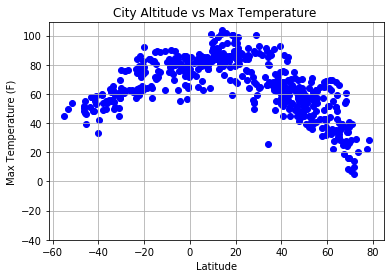

In [38]:
# Build a scatter plot for each data type
plt.scatter(city_data_pd["Lat"], city_data_pd["Max Temp"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Altitude vs Max Temperature ")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)


# # Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

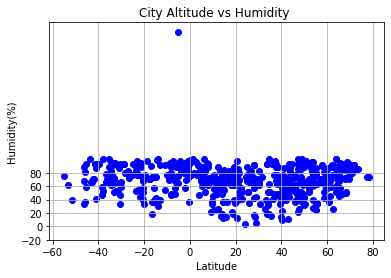

In [39]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Humidity"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Altitude vs Humidity ")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-20, 100, 20))


# # Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

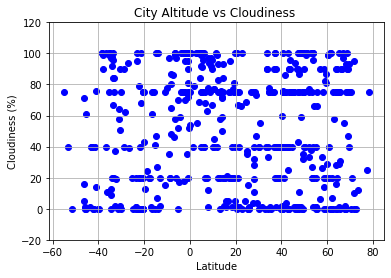

In [40]:
# Build a scatter plot for each data type
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Altitude vs Cloudiness ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-20, 140, 20))


# # Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

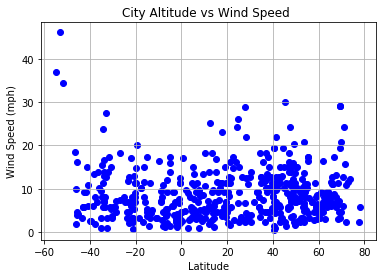

In [41]:
# Build a scatter plot for each data type
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Altitude vs Wind Speed ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)



# # Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [56]:

northern = city_data_pd.loc[city_data_pd["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = city_data_pd.loc[city_data_pd["Lat"] < 0.0]
southern.reset_index(inplace=True)



The r-squared is: -0.8132737563560299


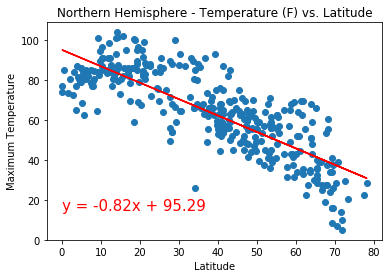

In [62]:
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.7599068731215369


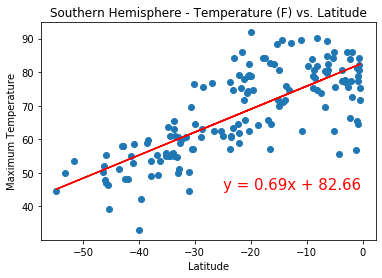

In [64]:
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.1085397287969892


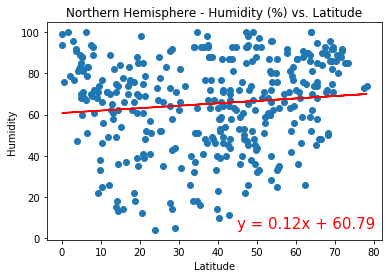

In [67]:
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.15376914422532045


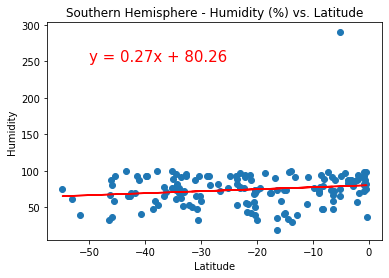

In [69]:
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,250),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.10740014843993263


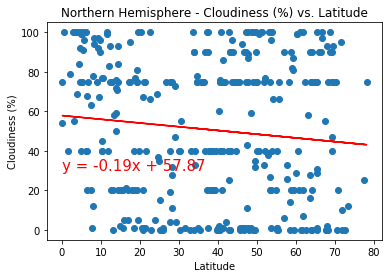

In [72]:
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.22737662097001782


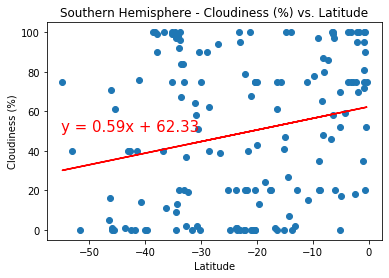

In [77]:
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.1154630654308239


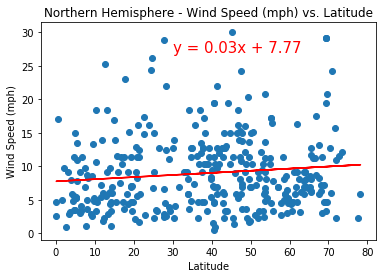

In [82]:
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,27),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.3295203808967018


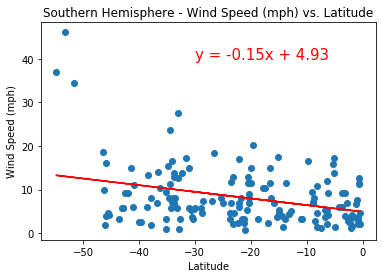

In [84]:
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.show()